<IPython.core.display.Javascript object>


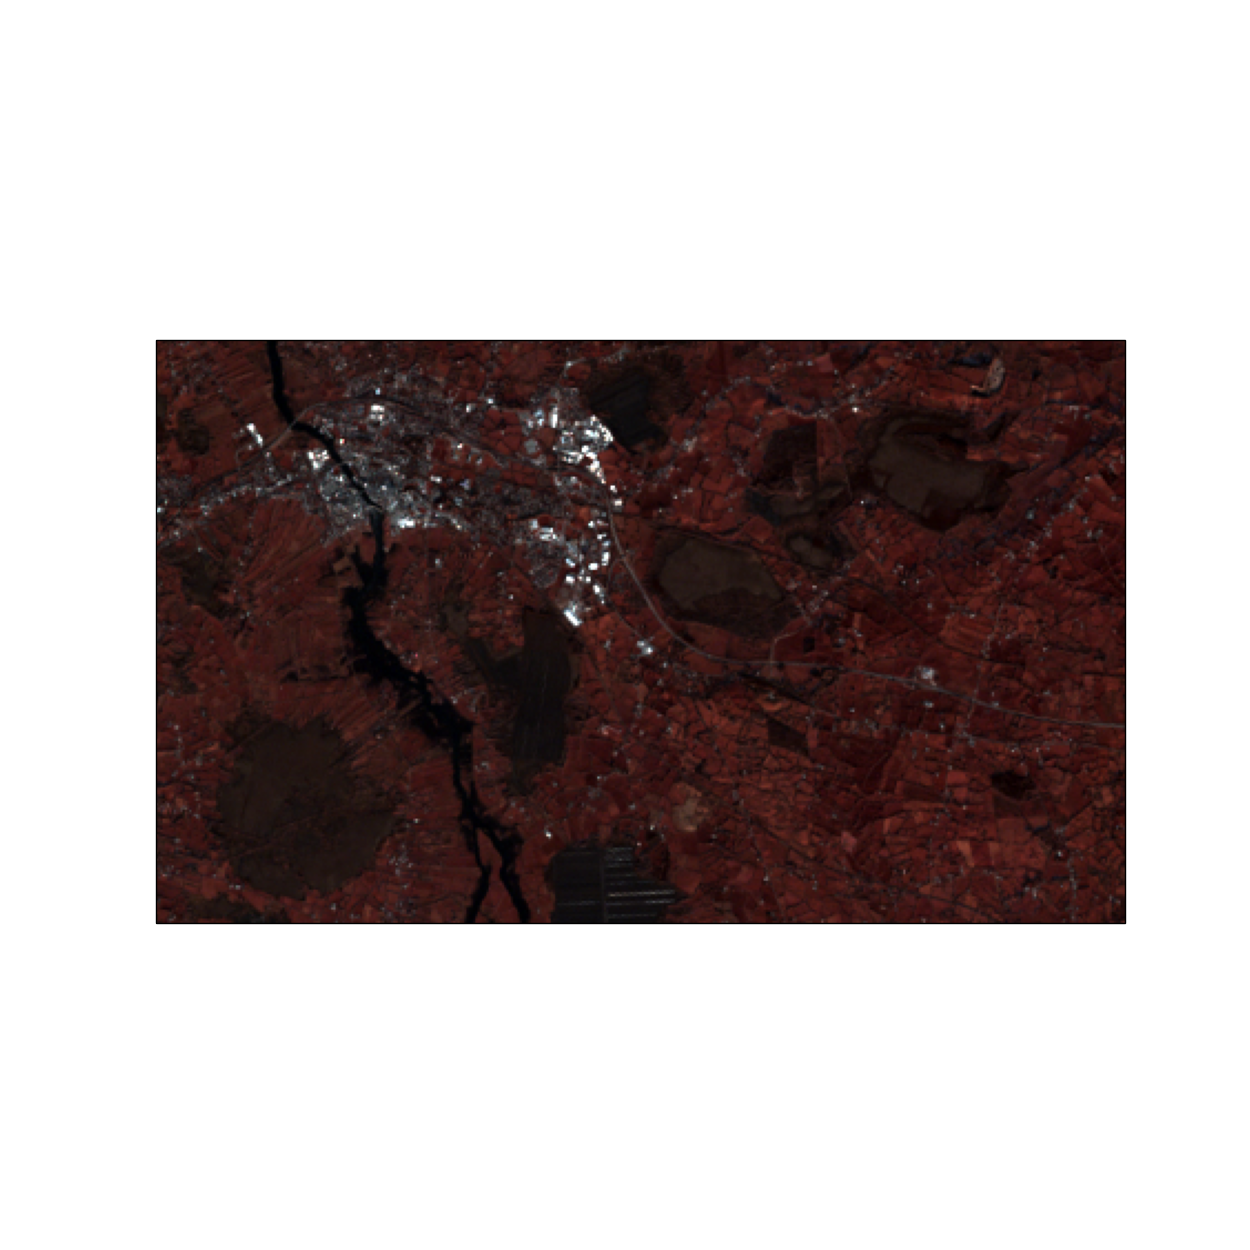

<IPython.core.display.Javascript object>


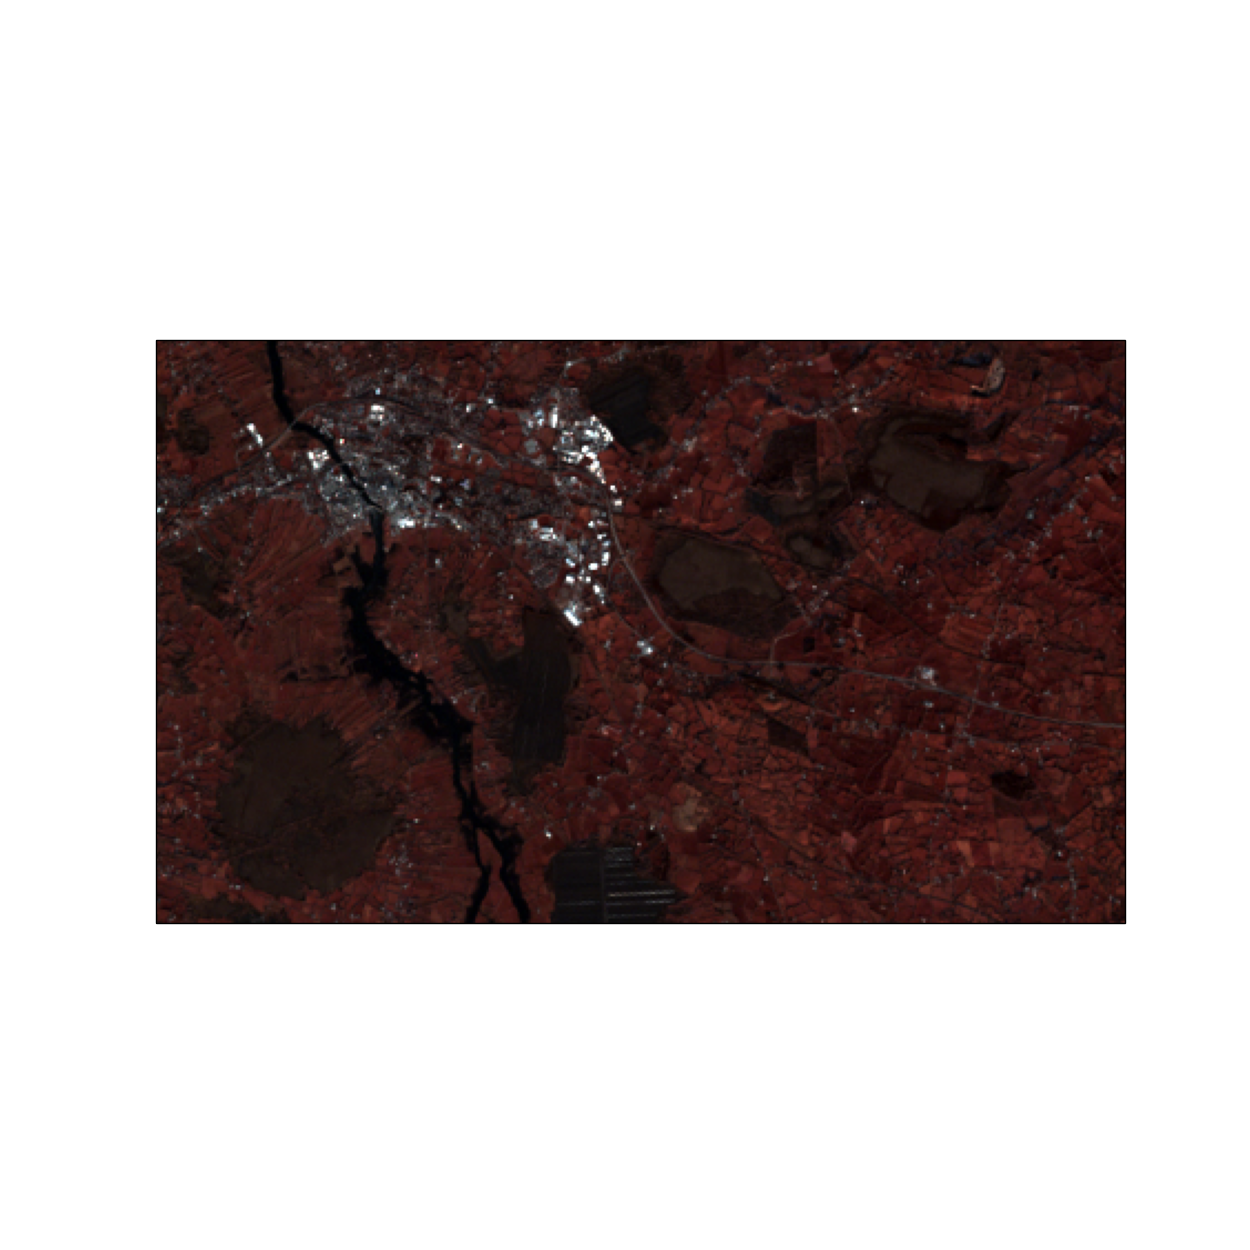

In [14]:
###This is a script designed to take an image from the Landsat 8 collection and run an NDVI on it. 
###To start, head over to the USGS portal and pick your Landsat 8 image, and download it. Make sure you have the seperate bands!



%matplotlib notebook

import numpy as np
import rasterio as rio
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

###Open your image and check the CRS to ensure it is in the desired projection
with rio.open('Image/full_image_test-msi_chip.img') as dataset:
    img = dataset.read()
    xmin, ymin, xmax, ymax = dataset.bounds


###Create a an axis for plotting. 
plotCRS = ccrs.UTM(29) # make sure that this UTM(x) corresponds to the CRS printed above
fig, ax = plt.subplots(1, 1, figsize = (10, 10), subplot_kw=dict(projection=plotCRS)) #HUGH CHANGE SOME PARAMETERS DON'T JUST COPY

#and plot
ax.imshow(img[0], cmap='gray', vmin=200, vmax=500, transform = plotCRS, extent = [xmin, xmax, ymin, ymax])


def img_display(image, ax, bands, transform, extent):
    '''
    This is where you should write a docstring.
    '''
    # first, we transpose the image to re-order the indices
    dispimg = image.transpose([1, 2, 0])

    # next, we have to scale the image.
    dispimg = dispimg / dispimg.max()

    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)

    return handle, ax

h, ax = img_display(img, ax, [2, 1, 0], plotCRS, [xmin, xmax, ymin, ymax])
fig # just to save you from scrolling back up to see


In [15]:
maxvals = [img[i].max() for i in range(dataset.count)]
print(maxvals)

[9872, 10055, 9757, 10360, 14231, 12904, 11844]


In [16]:
def percentile_stretch(image, pmin=0., pmax=100.):
    '''
    This is where you should write a docstring.
    '''
    # here, we make sure that pmin < pmax, and that they are between 0, 100
    if not 0 <= pmin < pmax <= 100:
        raise ValueError('0 <= pmin < pmax <= 100')
    # here, we make sure that the image is only 2-dimensional
    if not image.ndim == 2:
        raise ValueError('Image can only have two dimensions (row, column)')

    minval = np.percentile(image, pmin)
    maxval = np.percentile(image, pmax)

    stretched = (image - minval) / (maxval - minval) # stretch the image to 0, 1
    stretched[image < minval] = 0 # set anything less than minval to the new minimum, 0.
    stretched[image > maxval] = 1 # set anything greater than maxval to the new maximum, 1.

    return stretched

In [17]:
def img_display(image, ax, bands, transform, extent, pmin=0, pmax=100):
    '''
    This is where you should write a docstring.
    '''
    dispimg = image.copy().astype(np.float32) # make a copy of the original image,
    # but be sure to cast it as a floating-point image, rather than an integer

    for b in range(image.shape[0]): # loop over each band, stretching using percentile_stretch()
        dispimg[b] = percentile_stretch(image[b], pmin=pmin, pmax=pmax)

    # next, we transpose the image to re-order the indices
    dispimg = dispimg.transpose([1, 2, 0])

    # finally, we display the image
    handle = ax.imshow(dispimg[:, :, bands], transform=transform, extent=extent)

    return handle, ax

<IPython.core.display.Javascript object>


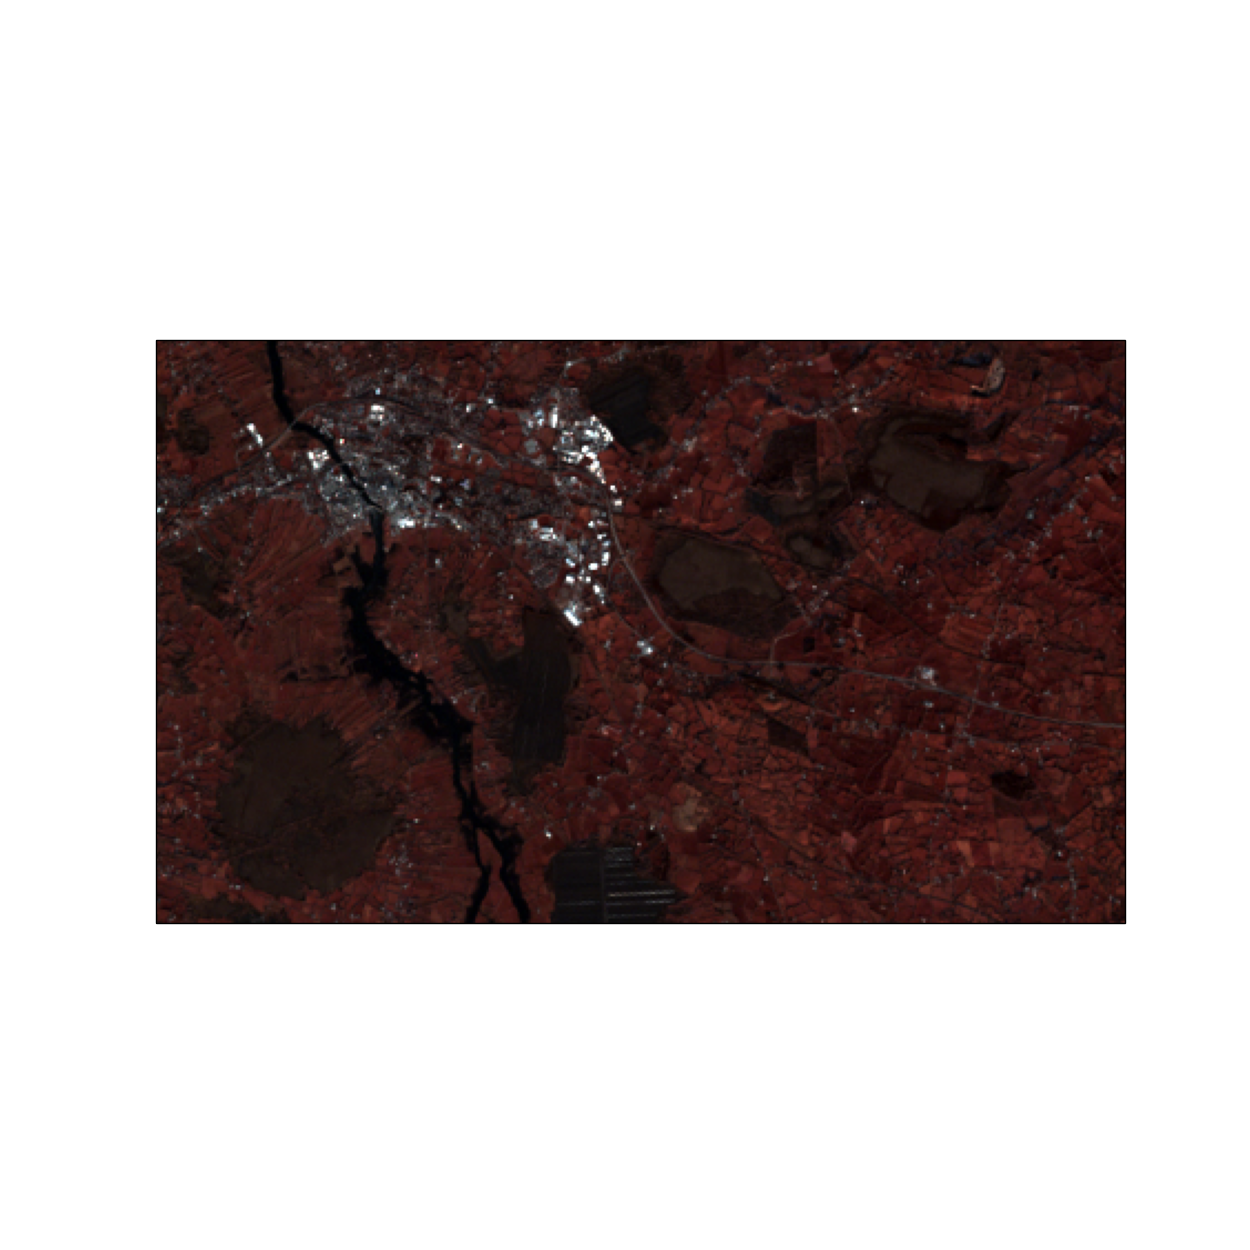

In [19]:
h, ax = img_display(img, ax, [2, 1, 0], plotCRS, [xmin, xmax, ymin, ymax], pmin=0.1, pmax=99.9)
fig # just to save you from scrolling back up to see